# <font color = "Red"> Marketing Analytics </font>

### For seeing the survey <a href="https://docs.google.com/forms/d/e/1FAIpQLScsrAC1U_m7sqRv_YEsCCtFLPPjgNKGWn9kZvSLKt-goPgdUw/viewform?fbzx=8424886140799763095">click here</a>


### For seeing and downloding the excel file (The result of our survey) <a href="https://github.com/Dforouzanfar/Marketing-Project/tree/master">click here</a>

# <font color = "Blue"> Segmentation </font>

### Contents:  
* [Loading the data](#LTD)  
* [Discovery of each column](#DoEC)  
* [Number of clusters](#NoC)  
* [Silhouette Analysis](#SiA)  
* [2 Segments solution - K-Means](#2SKM)  
* [2 Segments solution - Hierarchical Clustering](#2SHC)  
* [Positioning](#Pos)  
* [Targeting](#Tar)

In [ ]:
pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy import stats
import logging, sys
from pca import pca
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

<a id="LTD"></a>
## <font color = "Blue"> Loading the data </font>

In [ ]:
github_raw_url = "https://raw.githubusercontent.com/Dforouzanfar/Marketing-Project/master/Survey_Results.xlsx"
Ascoli = pd.read_excel(github_raw_url, index_col=0)

In [ ]:
Ascoli.head()

,Age,Gender,Travel Frequency,Preferred_1,Preferred_2,Preferred_3,Preferred_4,Price,Accessibility of transportation,Availability of information,Popularity of the place,Cultural/Historical activities,Social activities,Activities in nature,Gastronomical activities,Weather,Discovery
respondent_id,,,,,,,,,,,,,,,,,
1,20,1,2,Friends,Partner,Family,Alone,1,1,3,1,3,3,4,3,2,1
2,20,0,4,Friends,Family,Partner,Alone,3,5,4,3,4,3,3,5,4,3
3,20,1,2,Partner,Friends,Family,Alone,3,4,4,4,5,5,1,3,4,2
4,20,0,4,Friends,Family,Alone,Partner,4,5,4,1,5,5,3,4,5,1
5,20,1,1,Friends,Partner,Family,Alone,2,2,4,2,5,3,2,4,2,1


In [ ]:
Ascoli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Age                              20 non-null     int64 
 1   Gender                           20 non-null     int64 
 2   Travel Frequency                 20 non-null     int64 
 3   Preferred_1                      20 non-null     object
 4   Preferred_2                      20 non-null     object
 5   Preferred_3                      20 non-null     object
 6   Preferred_4                      20 non-null     object
 7   Price                            20 non-null     int64 
 8   Accessibility of transportation  20 non-null     int64 
 9   Availability of information      20 non-null     int64 
 10  Popularity of the place          20 non-null     int64 
 11  Cultural/Historical activities   20 non-null     int64 
 12  Social activities                20 no

<a id="DoEC"></a>
## <font color = "Blue"> Discovery of each column </font>

### <font color = "Green"> Age </font>

Note: Due to privacy reason, we don't use the full version. So, 20 means the person is somewhere in 20 to 30.

In [ ]:
data = Ascoli['Age'].astype('category')
data.describe()

count     20
unique     4
top       20
freq      17
Name: Age, dtype: int64

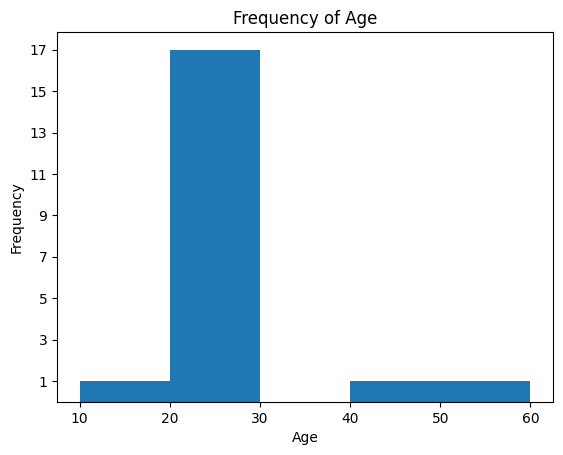

In [ ]:
plt.hist(Ascoli['Age'], bins=[10, 20, 30, 40, 50, 60])
plt.yticks([1, 3, 5, 7, 9, 11, 13, 15, 17])
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Frequency of Age')
plt.show()

As we see in the chart, most of our participants are in the third decade of their lifes.

### <font color = "Green"> Gender </font>
0: Female  
1: Male

In [ ]:
data = Ascoli['Gender'].astype('category')
data.describe()

count     20
unique     2
top        1
freq      12
Name: Gender, dtype: int64

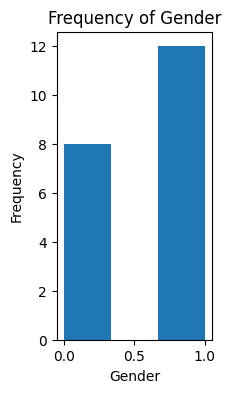

In [ ]:
plt.figure(figsize=(2, 4))
plt.hist(data, bins=3)
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Frequency of Gender')
plt.show()

As we see in the chart, we have 12 men and 8 women in our participants.

### <font color = "Green"> Travel Frequency </font>
By Travel Frequency we mean how often do a traveler travel in a year.

In [ ]:
data = Ascoli['Travel Frequency'].astype('category')
data.describe()

count     20
unique     5
top        3
freq       9
Name: Travel Frequency, dtype: int64

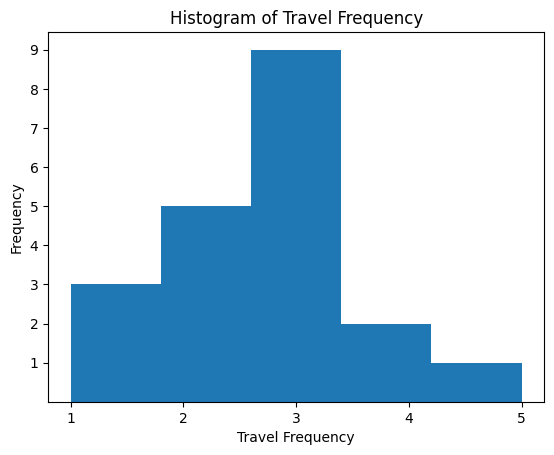

In [ ]:
plt.hist(data, bins=5)
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylabel('Frequency')
plt.xlabel('Travel Frequency')
plt.title('Histogram of Travel Frequency')
plt.show()

As we see in the chart, most of our participants travel about once a season.

### <font color = "Green"> Preferred Companion </font>

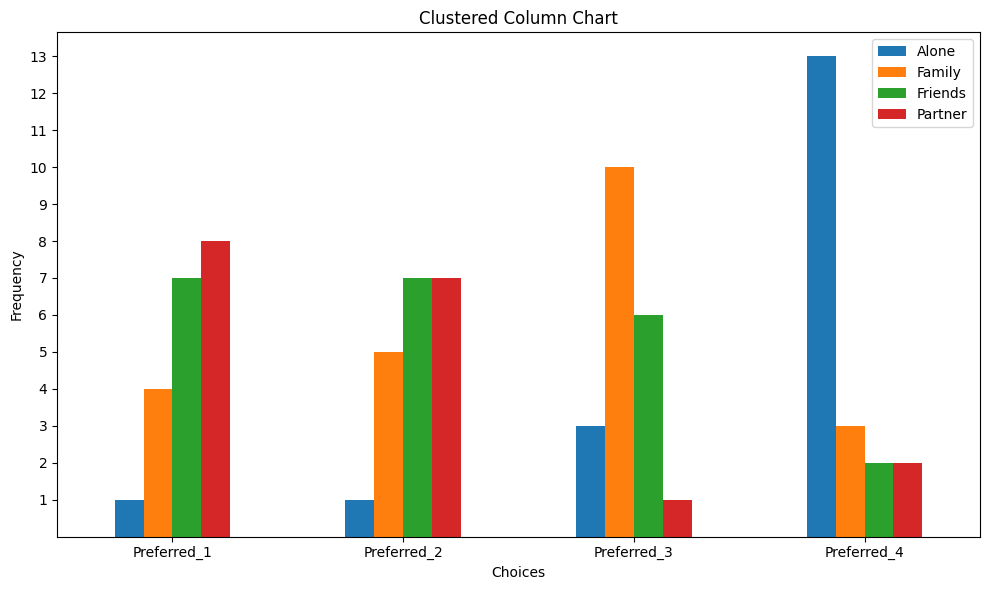

In [ ]:
data = Ascoli.iloc[:, 3:7]
value_counts = data.apply(pd.Series.value_counts)
df = value_counts.T

plt.figure(figsize=(10, 6))
df.plot(kind='bar', stacked=False, ax=plt.gca())  # Create clustered column chart
plt.title('Clustered Column Chart')
plt.xlabel('Choices')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.legend()
plt.tight_layout()
plt.show()

The Clustered Column Chart for Companion shows the participants' preferred companion of travelling. On first sight it can be easily observed how the majority of the respondents puts 'partner' and 'friends' as a first or second option. Travelling alone was most frequently chosen as a last option making it the least important factor in the survey.

### <font color = "Green"> Price </font>

In [ ]:
data = Ascoli['Price'].astype('category')
data.describe()

count     20
unique     5
top        2
freq       8
Name: Price, dtype: int64

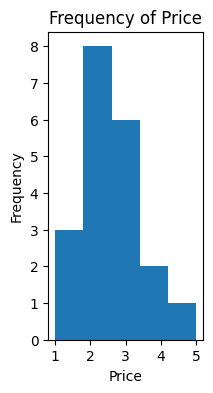

In [ ]:
plt.figure(figsize=(2, 4))
plt.hist(data, bins=5)
plt.xticks([1,2,3,4,5])
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Frequency of Price')
plt.show()

From this histogram, we can observe that the extreme rating is 2, meaning that most respondents prefer a cheaper trip and price is an important factor for them in choosing their travel destination. 8 respondents have chosen the rating of 2.

### <font color = "Green"> Accessibility of transportation </font>

In [ ]:
data = Ascoli['Accessibility of transportation'].astype('category')
data.describe()

count     20
unique     5
top        4
freq       9
Name: Accessibility of transportation, dtype: int64

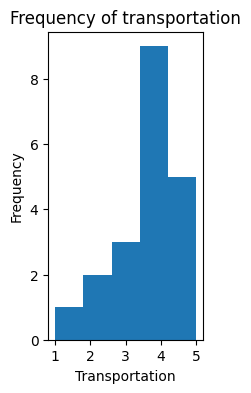

In [ ]:
plt.figure(figsize=(2, 4))
plt.hist(data, bins=5)
plt.xticks([1,2,3,4,5])
plt.ylabel('Frequency')
plt.xlabel('Transportation')
plt.title('Frequency of transportation')
plt.show()

From the above chart we can observe that 14 respondents have chosen the highest scale, 5, for this question. Hence the majority of respondents, consider the accessibilty of transportation, quite an important factor in deciding their travel destination. We can also observe that out of the other 6 remaining reponses, again 3 of them scored towards the higher scale of 3 or 4 and meaning that transportation is still an important factor for them but on a lower level compared to the majority. Only 3 respondents have chosen a low scale (1 or 2) for this question which means that only a very small portion of these respondents don't consider accessibility of transportation that important.

### <font color = "Green"> Availability of information </font>

In [ ]:
data = Ascoli['Availability of information'].astype('category')
data.describe()

count     20
unique     4
top        4
freq       8
Name: Availability of information, dtype: int64

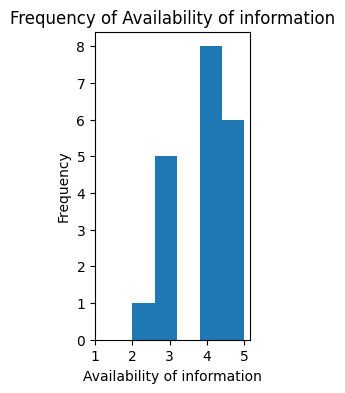

In [ ]:
plt.figure(figsize=(2, 4))
plt.hist(data, bins=5)
plt.xticks([1,2,3,4,5])
plt.ylabel('Frequency')
plt.xlabel('Availability of information')
plt.title('Frequency of Availability of information')
plt.show()

Looking at the histogram plot of information, we can easily observe the extremes. Majority of respondents consider accessibility of information an important factor, as it's been rated four by 8 respondents and five by other 6 respondents. We can also observe that a rating of three has been given by another 5 respondents meaning that they are quite neutral towards this factor. Only 1 of the respondents has given a low rating of two to this question. The overall average rating is 3.95, which makes us understand the accessibility of information is quite an important factor for visitors but it's not as important as price

### <font color = "Green"> Popularity of the place </font>

In [ ]:
data = Ascoli['Popularity of the place'].astype('category')
data.describe()

count     20
unique     5
top        2
freq       8
Name: Popularity of the place, dtype: int64

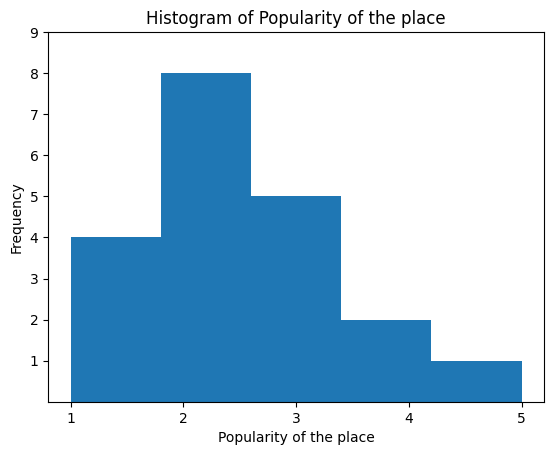

In [ ]:
plt.hist(data, bins=5)
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylabel('Frequency')
plt.xlabel('Popularity of the place')
plt.title('Histogram of Popularity of the place')
plt.show()

The Histogram of Popularity of the place is mostly shifted with a peak towards the left. 4 respondents rated the importance of the popularity of their travel destination a 1, 8 and most respondents rated this importance a 2, 5 respondents rated it with a 3, 2 with a 4 and only 1 respondent considered this very important and rated it with a 5. From this there can be concluded that this is not a factor most people choose their travel destination for.

### <font color = "Green"> Cultural/Historical activities </font>

In [ ]:
data = Ascoli['Cultural/Historical activities'].astype('category')
data.describe()

count     20
unique     4
top        3
freq       7
Name: Cultural/Historical activities, dtype: int64

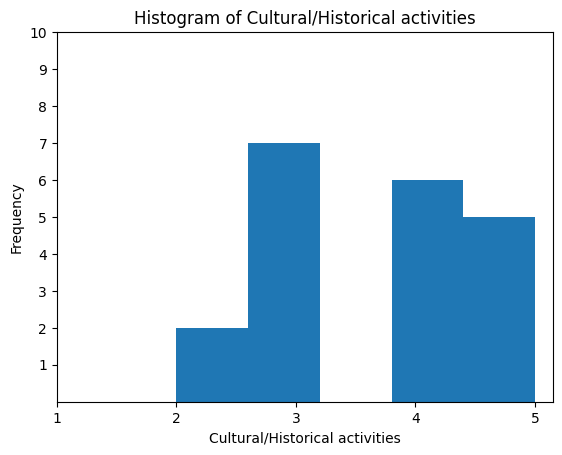

In [ ]:
plt.hist(data, bins=5)
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.ylabel('Frequency')
plt.xlabel('Cultural/Historical activities')
plt.title('Histogram of Cultural/Historical activities')
plt.show()

In the Histogram of Cultural/Historical activities the mode is found in the middle, where 7 respondents rated the importance of cultural and historical activities during their trip with a score of 3. 6 respondents rated it with a 4 and 5 respondents rated it even with a 5. Only 2 respondents rated it below the mode and considered this importance a 2. Therefore cultural and historical activities have a mean of 3.7 and can be considered as an important factor.

### <font color = "Green"> Social activities </font>

In [ ]:
data = Ascoli['Social activities'].astype('category')
data.describe()

count     20
unique     5
top        2
freq       8
Name: Social activities, dtype: int64

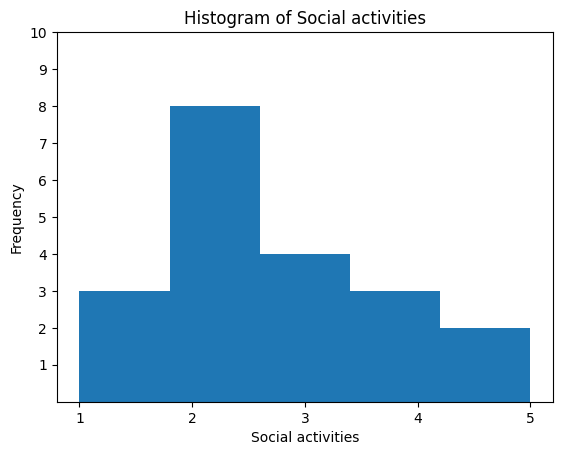

In [ ]:
plt.hist(data, bins=5)
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.ylabel('Frequency')
plt.xlabel('Social activities')
plt.title('Histogram of Social activities')
plt.show()

The Histogram of Social Activities is like the Histogram of popularity shifted with a peak to the left. The mode is seen with the answers of 8 respondents for a rating of 2, considering the majority of the respondents does not find social activities the most important factor in rating their trip. 3 respondents agree with this and rate this importancy with a score of 1. However, 4 respondents rated it a 2, 3 respondents rated it a 4, and 2 respondents rated it even with a 5. Therefore there can be concluded that the opinion about social activities is quite distributed.

### <font color = "Green"> Activities in nature </font>

In [ ]:
data = Ascoli['Activities in nature'].astype('category')
data.describe()

count     20
unique     5
top        4
freq       9
Name: Activities in nature, dtype: int64

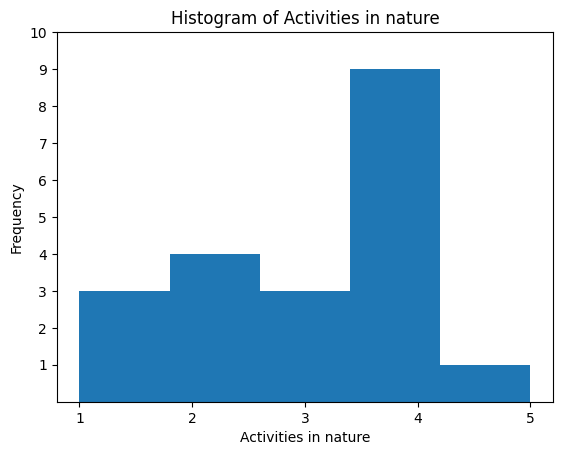

In [ ]:
plt.hist(data, bins=5)
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.ylabel('Frequency')
plt.xlabel('Activities in nature')
plt.title('Histogram of Activities in nature')
plt.show()

Again, in the Historgram of Activities in nature we have an obvious peak. The activity was rated by 9 respondents with a score of 4. One respondent rated the importance even higher, with a 5, but besides that all the respondents rated below. 3 people gave it a score of 1, four people a score of 2, and 3 people a score of 3. The average of 3.05 concludes that activities in nature are somewhat important.

### <font color = "Green"> Gastronomical activities </font>

In [ ]:
data = Ascoli['Gastronomical activities'].astype('category')
data.describe()

count     20
unique     4
top        4
freq       8
Name: Gastronomical activities, dtype: int64

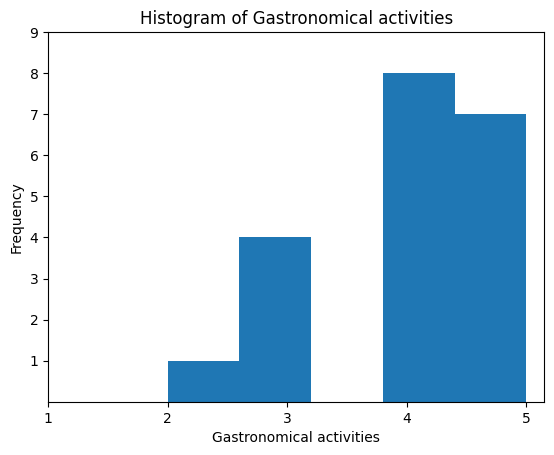

In [ ]:
plt.hist(data, bins=5)
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylabel('Frequency')
plt.xlabel('Gastronomical activities')
plt.title('Histogram of Gastronomical activities')
plt.show()

Regarding the Histogram of Gastronomical Activities, the desire for these gastronomical activities and the discovery of local traditions about food can be easily observed. 8 respondents rated this factor with a rating of 4 and 7 respondents rated this factor with the highest option, a 5. 4 respondents rated it a 3 and only 1 respondent gave it a 2. This leaves us with an average of 4.05 which is the highest average score until now. Therefore there can be concluded that the majority of the respondents consider this the most important factor in rating or choosing a travel destination.

### <font color = "Green"> Weather </font>

In [ ]:
data = Ascoli['Weather'].astype('category')
data.describe()

count     20
unique     5
top        4
freq       8
Name: Weather, dtype: int64

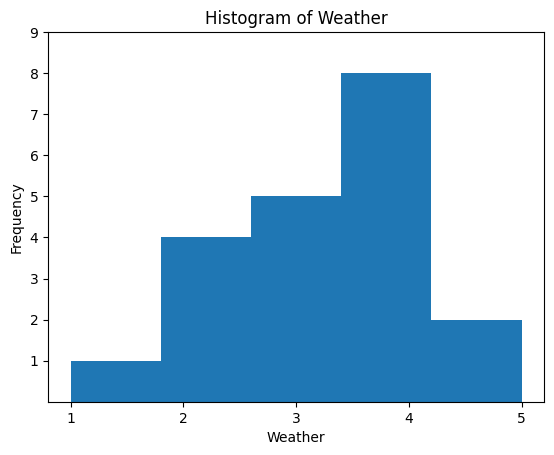

In [ ]:
plt.hist(data, bins=5)
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylabel('Frequency')
plt.xlabel('Weather')
plt.title('Histogram of Weather')
plt.show()

The Histogram of weather has a peak towards the right. The mode of option 4 was chosen by 8 respondents considering they prefer more tropical weather. 2 respondents rated it a 5, desering even more tropical weather. 5 respondents rated it a 3, 4 respondents a 2 and 1 respondent a 1, which shows they don't desire as tropical weather as the mode.

### <font color = "Green"> Discovery </font>

In [ ]:
data = Ascoli['Discovery'].astype('category')
data.describe()

count     20
unique     3
top        1
freq      10
Name: Discovery, dtype: int64

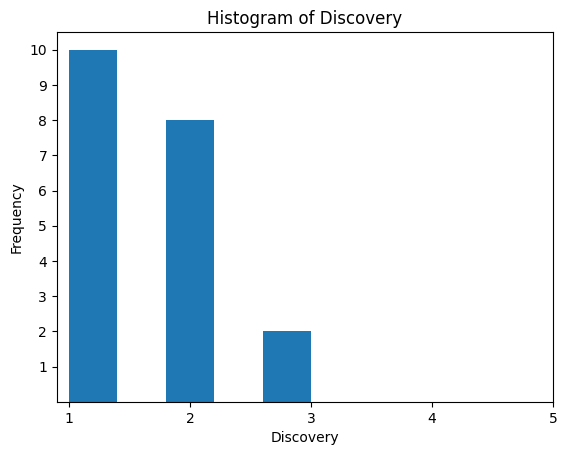

In [ ]:
plt.hist(data, bins=5)
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.ylabel('Frequency')
plt.xlabel('Discovery')
plt.title('Histogram of Discovery')
plt.show()

Finally, the last question in the survey discusses the importance of the way respondents prefer to discover during their trip, with one being individually and 5 preferring travelling in toured guides. Easily can be observed that none of the respondents rated it higher then a 3, thus no one prefers to discover their travel destination in toured guides.

<a id="NoC"></a>
## <font color = "Blue"> Number of clusters </font>
After analyzing the data, it's noticeable that there's not a lot of variance in the age range of our respondents. This lack of diversity reduces the statistical significance of age as a distinguishing factor in our segmentation analysis. Consequently, we've decided to omit age from the segmentation process, recognizing its limited contribution to meaningful distinctions in our dataset.

In [ ]:
Ascoli_selected_columns = Ascoli.iloc[:, ~Ascoli.columns.isin(['Age', 'Preferred_1', 'Preferred_2', 'Preferred_3', 'Preferred_4'])]
Ascoli_selected_columns

,Gender,Travel Frequency,Price,Accessibility of transportation,Availability of information,Popularity of the place,Cultural/Historical activities,Social activities,Activities in nature,Gastronomical activities,Weather,Discovery
respondent_id,,,,,,,,,,,,
1,1,2,1,1,3,1,3,3,4,3,2,1
2,0,4,3,5,4,3,4,3,3,5,4,3
3,1,2,3,4,4,4,5,5,1,3,4,2
4,0,4,4,5,4,1,5,5,3,4,5,1
5,1,1,2,2,4,2,5,3,2,4,2,1
6,1,5,2,2,2,1,3,2,2,4,3,2
7,0,2,1,4,3,2,3,2,3,2,4,1
8,1,3,3,4,5,3,4,3,4,5,2,1
9,1,3,1,3,4,2,4,2,2,3,4,2


### <font color = "Green"> Elbow method (KMeans) </font>

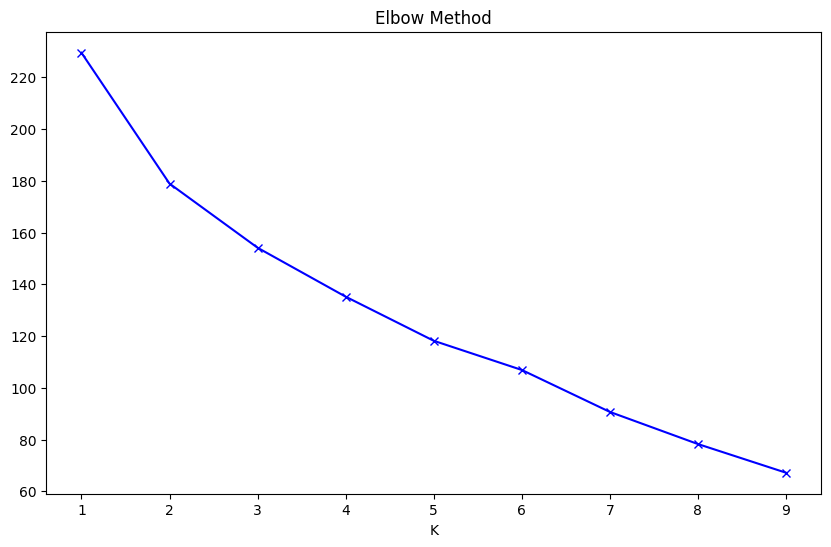

In [ ]:
warnings.filterwarnings("ignore")

distortions = [KMeans(n_clusters=K).fit(Ascoli_selected_columns).inertia_ for K in range(1,10)]

plt.figure(figsize=(10,6))
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('K')
plt.title('Elbow Method');

### <font color = "Green"> Elbow method (KElbowVisualizer) </font>

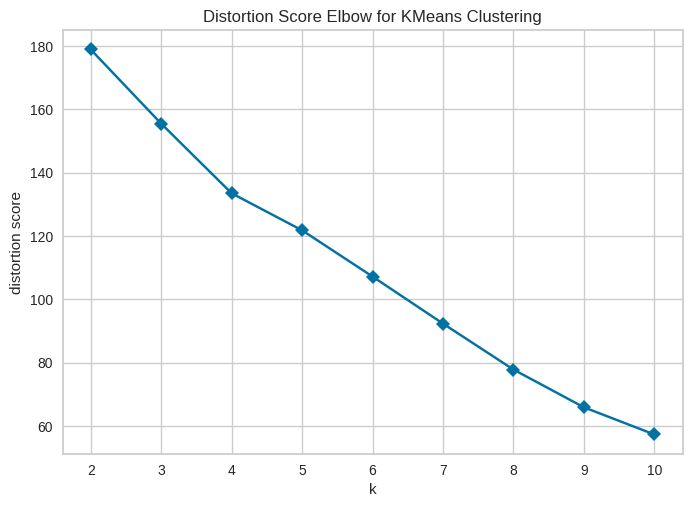

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, timings=False)
visualizer.fit(Ascoli_selected_columns)
visualizer.show();

### <font color = "Green"> Silhouette Score (KElbowVisualizer) </font>

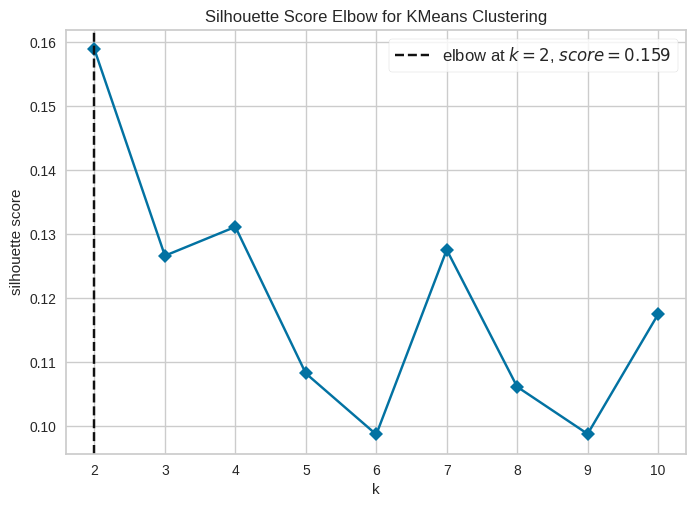

In [ ]:
visualizer = KElbowVisualizer(model,metric='silhouette',timings=False)
visualizer.fit(Ascoli_selected_columns)
visualizer.show();

### <font color = "Green"> Calinski-Harabasz criterion (KElbowVisualizer) </font>

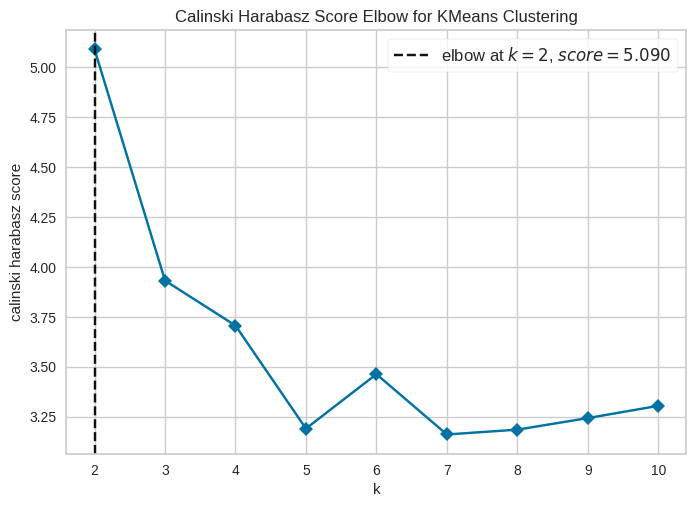

In [ ]:
visualizer = KElbowVisualizer(model,metric='calinski_harabasz',timings=False)
visualizer.fit(Ascoli_selected_columns)
visualizer.show();

<a id="SiA"></a>
## <font color = "Blue"> Silhouette Analysis </font>

For n_clusters = 2 The average silhouette_score is : 0.15888222026462054
For n_clusters = 3 The average silhouette_score is : 0.14793404766874269
For n_clusters = 4 The average silhouette_score is : 0.12216357226843604
For n_clusters = 5 The average silhouette_score is : 0.12737687254956745


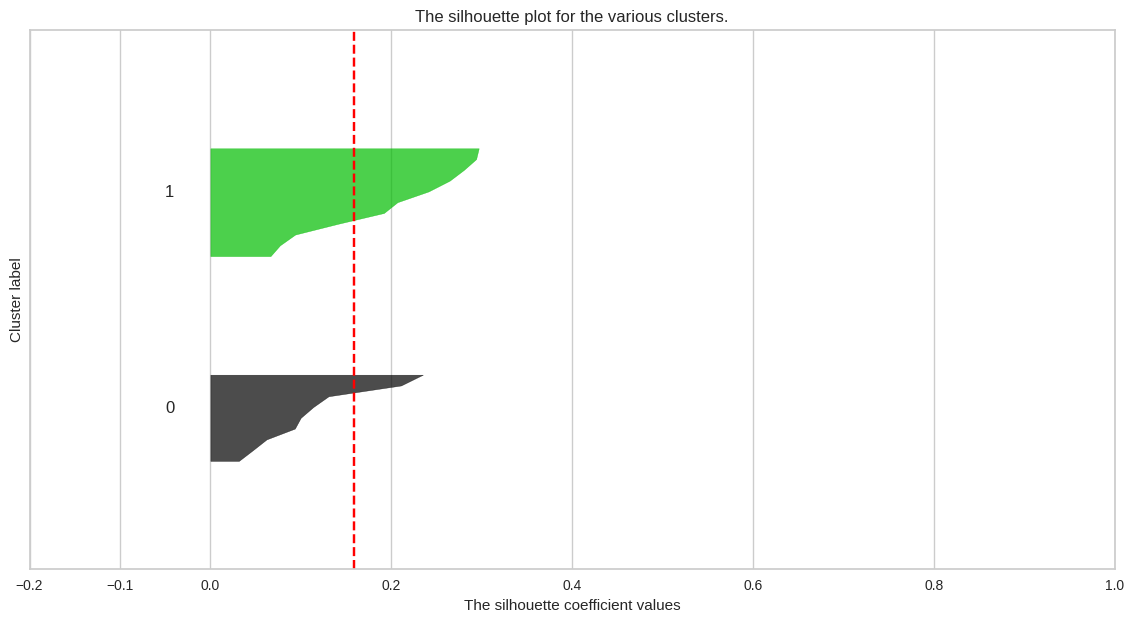

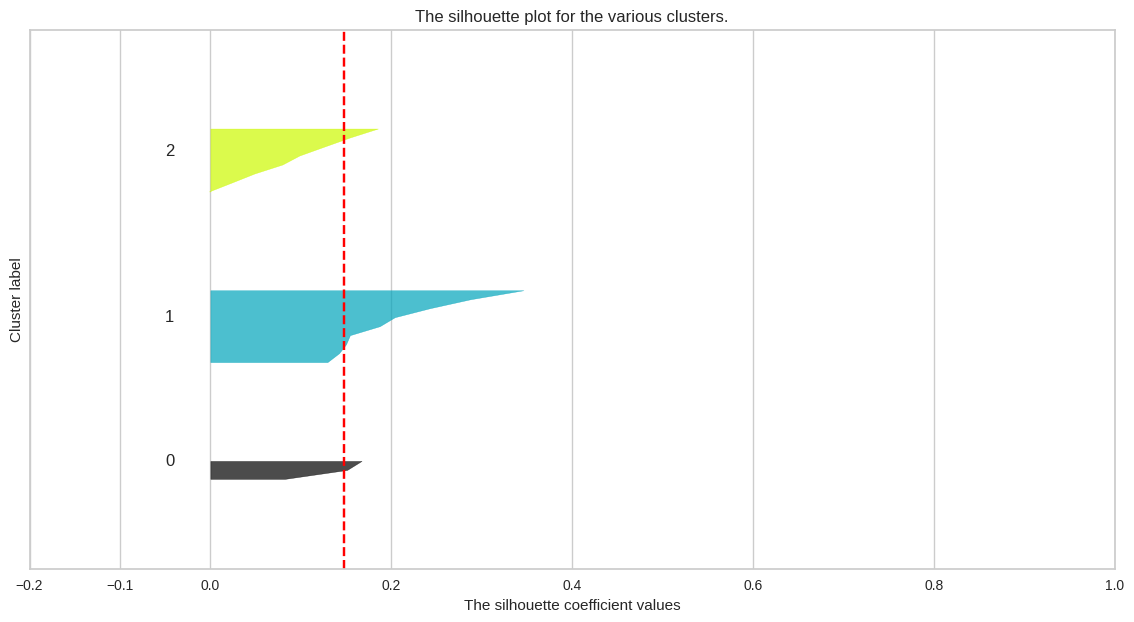

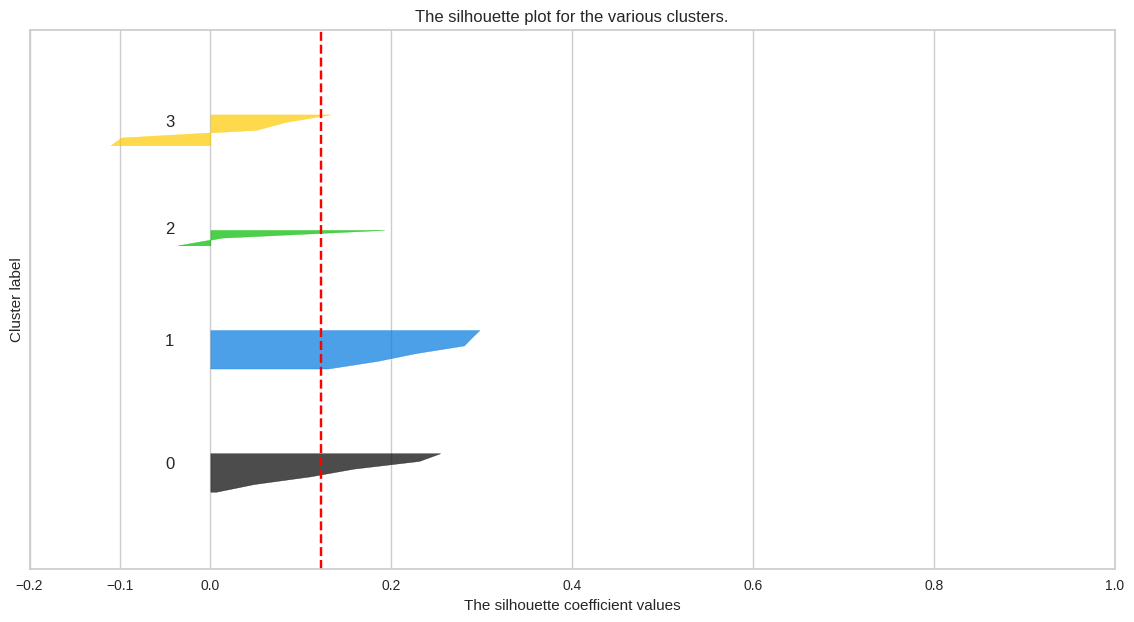

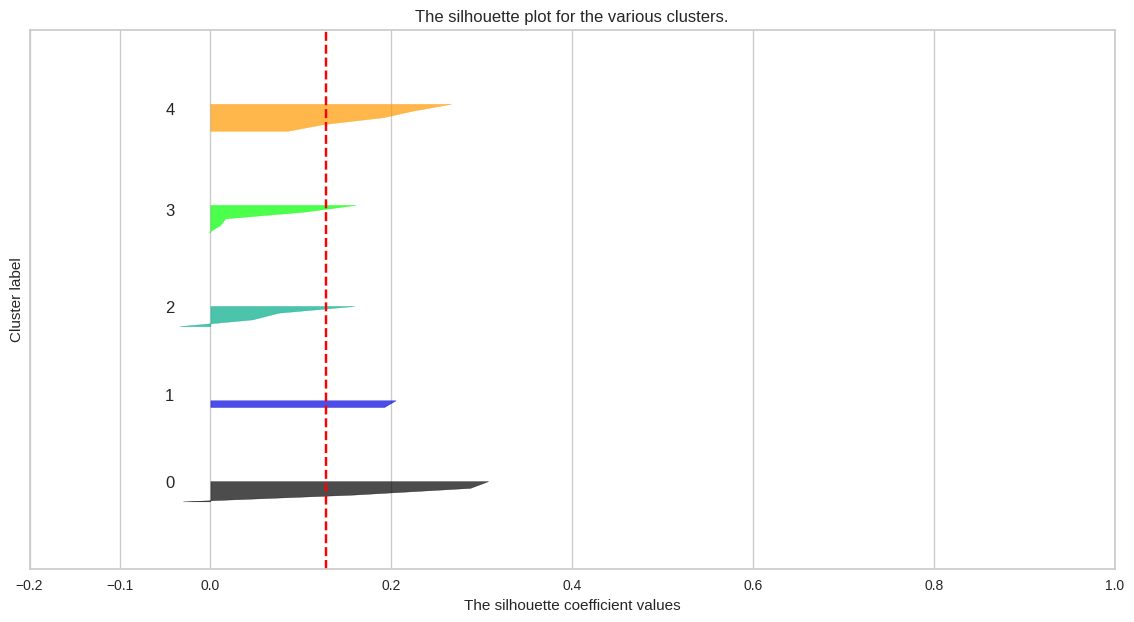

In [ ]:
X = Ascoli_selected_columns.to_numpy()
range_n_clusters = [2, 3, 4, 5]


for n_clusters in range_n_clusters:
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 7)

    # Silhouette plot

    ax.set_xlim([-0.2, 1])
    # inserting blank space between silhouette

    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels = clusterer.fit_predict(X)


    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])
    ax.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



plt.show()

<a id="2SKM"></a>
## <font color = "Blue"> 2 Segments solution using K-Means </font>

In [ ]:
Ascoli_selected_columns["Segment"] = KMeans(n_clusters=2, random_state=42).fit(Ascoli_selected_columns).labels_
Ascoli_selected_columns["Segment"] = Ascoli_selected_columns["Segment"] + 1
Ascoli_selected_columns

,Gender,Travel Frequency,Price,Accessibility of transportation,Availability of information,Popularity of the place,Cultural/Historical activities,Social activities,Activities in nature,Gastronomical activities,Weather,Discovery,Segment
respondent_id,,,,,,,,,,,,,
1,1,2,1,1,3,1,3,3,4,3,2,1,1
2,0,4,3,5,4,3,4,3,3,5,4,3,2
3,1,2,3,4,4,4,5,5,1,3,4,2,2
4,0,4,4,5,4,1,5,5,3,4,5,1,2
5,1,1,2,2,4,2,5,3,2,4,2,1,1
6,1,5,2,2,2,1,3,2,2,4,3,2,1
7,0,2,1,4,3,2,3,2,3,2,4,1,1
8,1,3,3,4,5,3,4,3,4,5,2,1,2
9,1,3,1,3,4,2,4,2,2,3,4,2,1


### <font color = "Green"> Segment sizes </font>

In [ ]:
Ascoli_selected_columns_Sizes = pd.DataFrame(Ascoli_selected_columns.groupby("Segment").size(),columns=["Size"]).T
Ascoli_selected_columns_Sizes.insert(0,"Population",len(Ascoli_selected_columns))
Ascoli_selected_columns_Sizes.loc["%"] = Ascoli_selected_columns_Sizes.iloc[0].div(Ascoli_selected_columns_Sizes.iloc[0,0]).mul(100).astype(int)
Ascoli_selected_columns_Sizes

Segment,Population,1,2
Size,20,11,9
%,100,55,45


### <font color = "Green"> Segments description </font>
Means of segmentation variables by segment

In [ ]:
Ascoli_selected_columns_Means = Ascoli_selected_columns.groupby("Segment").mean().T
Ascoli_selected_columns_Means.insert(0,"Population",Ascoli_selected_columns.drop(columns="Segment").mean())
Ascoli_selected_columns_Means.round(2)

Segment,Population,1,2
Gender,0.60,0.64,0.56
Travel Frequency,2.65,2.64,2.67
Price,2.50,1.91,3.22
Accessibility of transportation,3.75,3.36,4.22
Availability of information,3.95,3.73,4.22
Popularity of the place,2.40,1.73,3.22
Cultural/Historical activities,3.70,3.18,4.33
Social activities,2.65,1.91,3.56
Activities in nature,3.05,2.64,3.56
Gastronomical activities,4.05,3.82,4.33


### <font color = "Green"> T-test </font>

In [ ]:
ASC = Ascoli_selected_columns.copy()

def style_cols(col):
    if col.name == "Population": return ["background-color: white"]*len(col)

    segment = ASC[ASC.Segment == col.name]
    rest_pop = ASC[ASC.Segment != col.name]

    colors = []
    for var_name, var_segment_mean in col.iteritems():
        t_test, p_value = stats.ttest_ind(segment[var_name], rest_pop[var_name],equal_var=False)
        if p_value < 0.05:
            color = "background-color: green" if var_segment_mean > rest_pop[var_name].mean() else "background-color: red"
        elif p_value < 0.1:
            color = "background-color: #90ee90" if var_segment_mean > rest_pop[var_name].mean() else "background-color: #f1807e"
        else: color = "background-color: white"
        colors.append(color)
    return colors

Ascoli_selected_columns_Means.style.apply(style_cols).format("{:.2f}")

Segment,Population,1,2
Gender,0.60,0.64,0.56
Travel Frequency,2.65,2.64,2.67
Price,2.50,1.91,3.22
Accessibility of transportation,3.75,3.36,4.22
Availability of information,3.95,3.73,4.22
Popularity of the place,2.40,1.73,3.22
Cultural/Historical activities,3.70,3.18,4.33
Social activities,2.65,1.91,3.56
Activities in nature,3.05,2.64,3.56
Gastronomical activities,4.05,3.82,4.33


### <font color = "Green"> Segmentation - PCA </font>

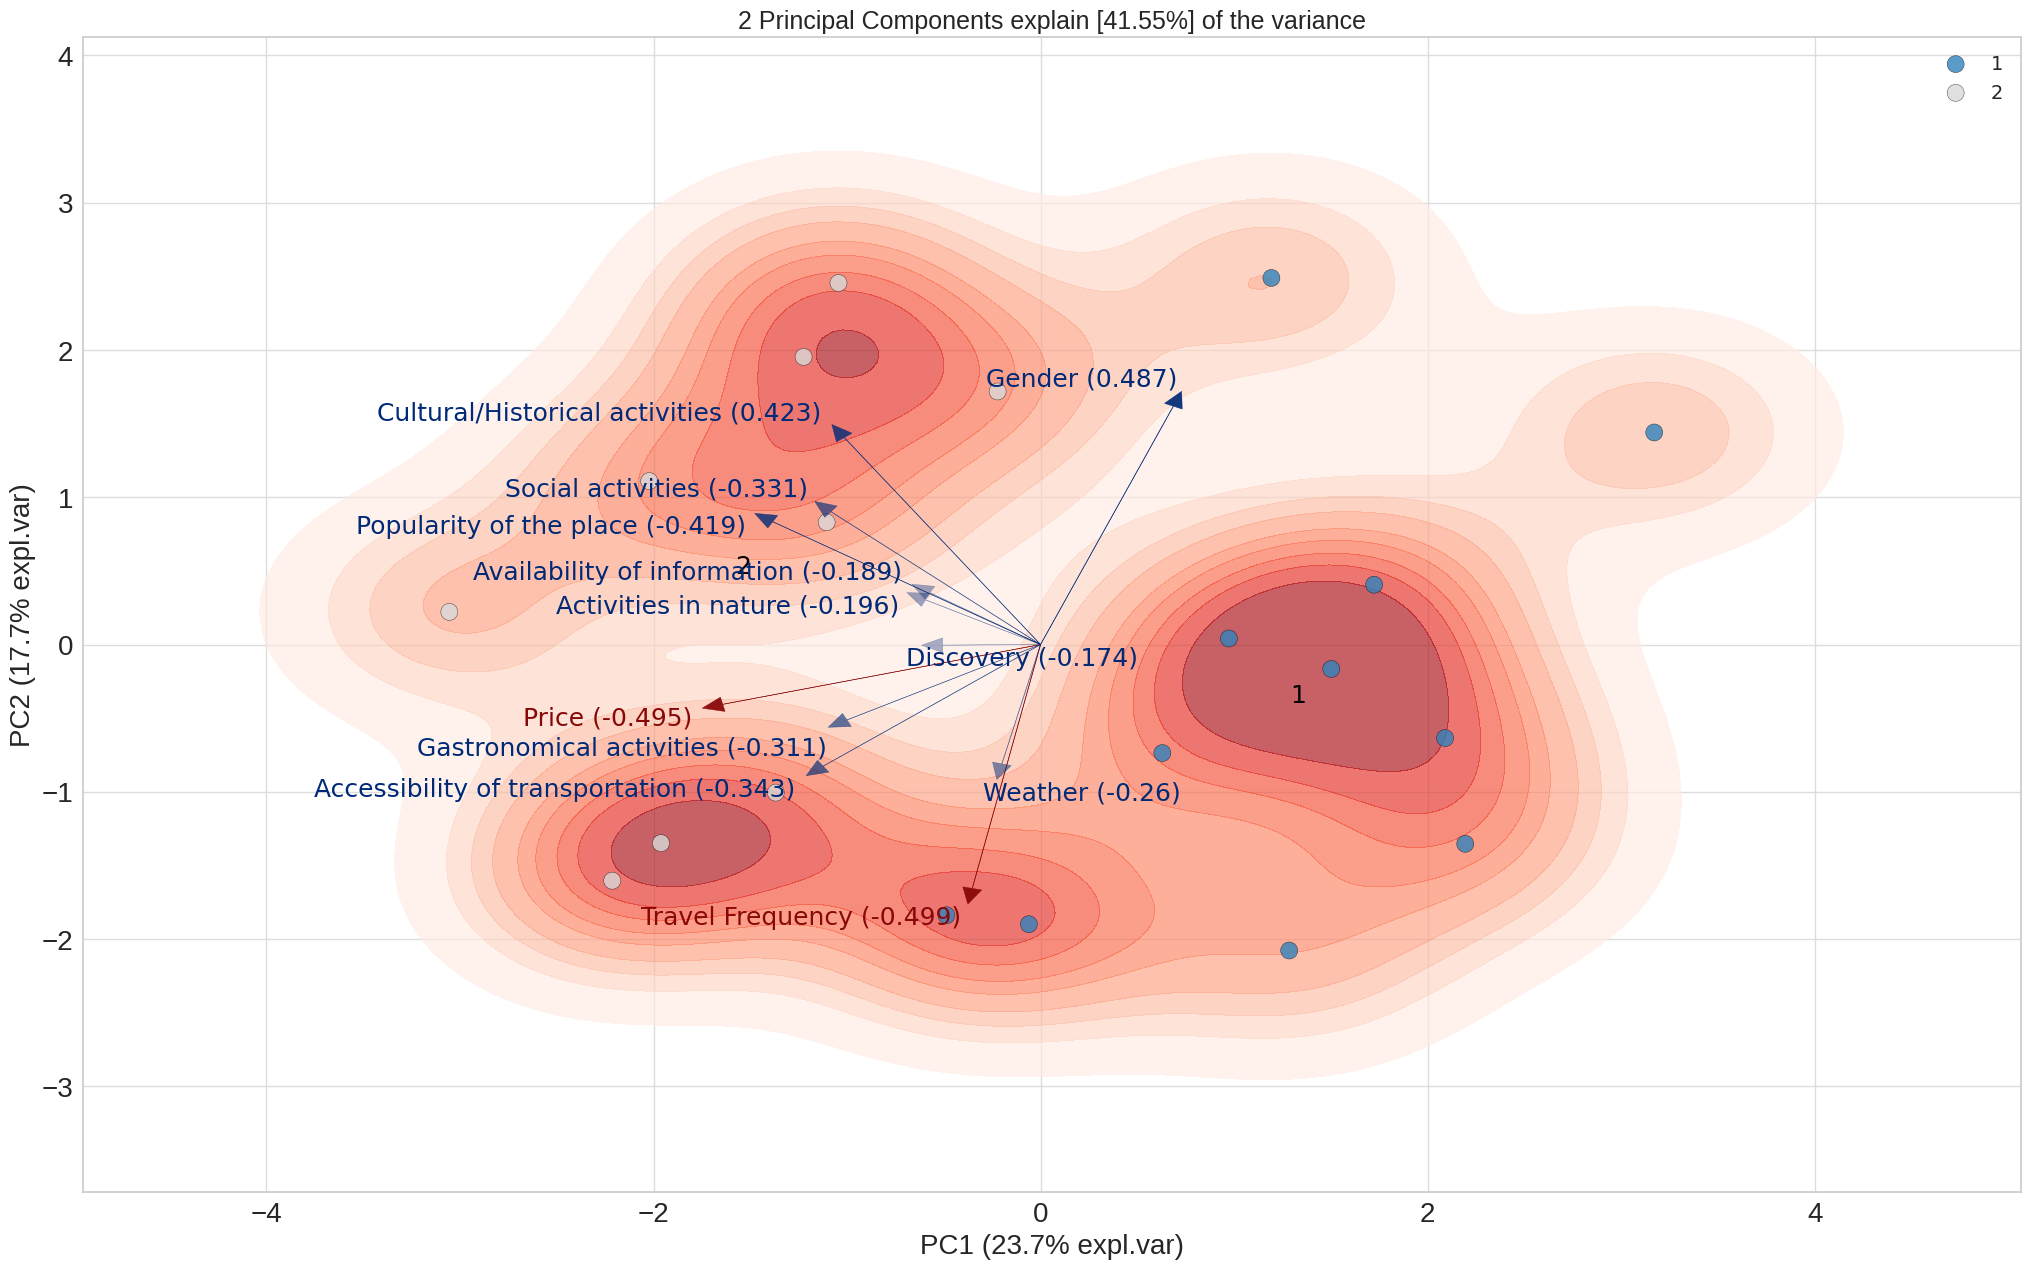

In [ ]:
logging.disable(sys.maxsize)

model = pca(n_components=2,normalize=True)

features = Ascoli_selected_columns.drop(columns="Segment")
segments = Ascoli_selected_columns.Segment

# Fit transform
results = model.fit_transform(features,verbose=False)

fig, ax = model.biplot(labels=segments,verbose=0,density=True);

<a id="2SHC"></a>
## <font color = "Blue"> 2 Segments solution using Hierarchical Clustering </font>

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2, affinity="euclidean", linkage="ward")
hc.fit(Ascoli_selected_columns)

Ascoli_selected_columns["SegmentHC"] = hc.labels_ + 1
Ascoli_selected_columns

,Gender,Travel Frequency,Price,Accessibility of transportation,Availability of information,Popularity of the place,Cultural/Historical activities,Social activities,Activities in nature,Gastronomical activities,Weather,Discovery,Segment,SegmentHC
respondent_id,,,,,,,,,,,,,,
1,1,2,1,1,3,1,3,3,4,3,2,1,1,1
2,0,4,3,5,4,3,4,3,3,5,4,3,2,2
3,1,2,3,4,4,4,5,5,1,3,4,2,2,2
4,0,4,4,5,4,1,5,5,3,4,5,1,2,2
5,1,1,2,2,4,2,5,3,2,4,2,1,1,1
6,1,5,2,2,2,1,3,2,2,4,3,2,1,1
7,0,2,1,4,3,2,3,2,3,2,4,1,1,1
8,1,3,3,4,5,3,4,3,4,5,2,1,2,2
9,1,3,1,3,4,2,4,2,2,3,4,2,1,1


### <font color = "Green"> Segments sizes </font>

In [ ]:
Ascoli_selected_columns_SizesHC = pd.DataFrame(Ascoli_selected_columns.groupby("SegmentHC").size(),columns=["Size"]).T
Ascoli_selected_columns_SizesHC.insert(0,"Population",len(Ascoli_selected_columns))
Ascoli_selected_columns_SizesHC.loc["%"] = Ascoli_selected_columns_SizesHC.iloc[0].div(Ascoli_selected_columns_SizesHC.iloc[0,0]).mul(100).astype(int)
Ascoli_selected_columns_SizesHC

SegmentHC,Population,1,2
Size,20,11,9
%,100,55,45


Are "Segment" and "SegmentHC" columns equal?

In [ ]:
Ascoli_selected_columns['Segment'].equals(Ascoli_selected_columns['SegmentHC'].astype("int32"))

True

### <font color = "Green"> Dendrogram </font>

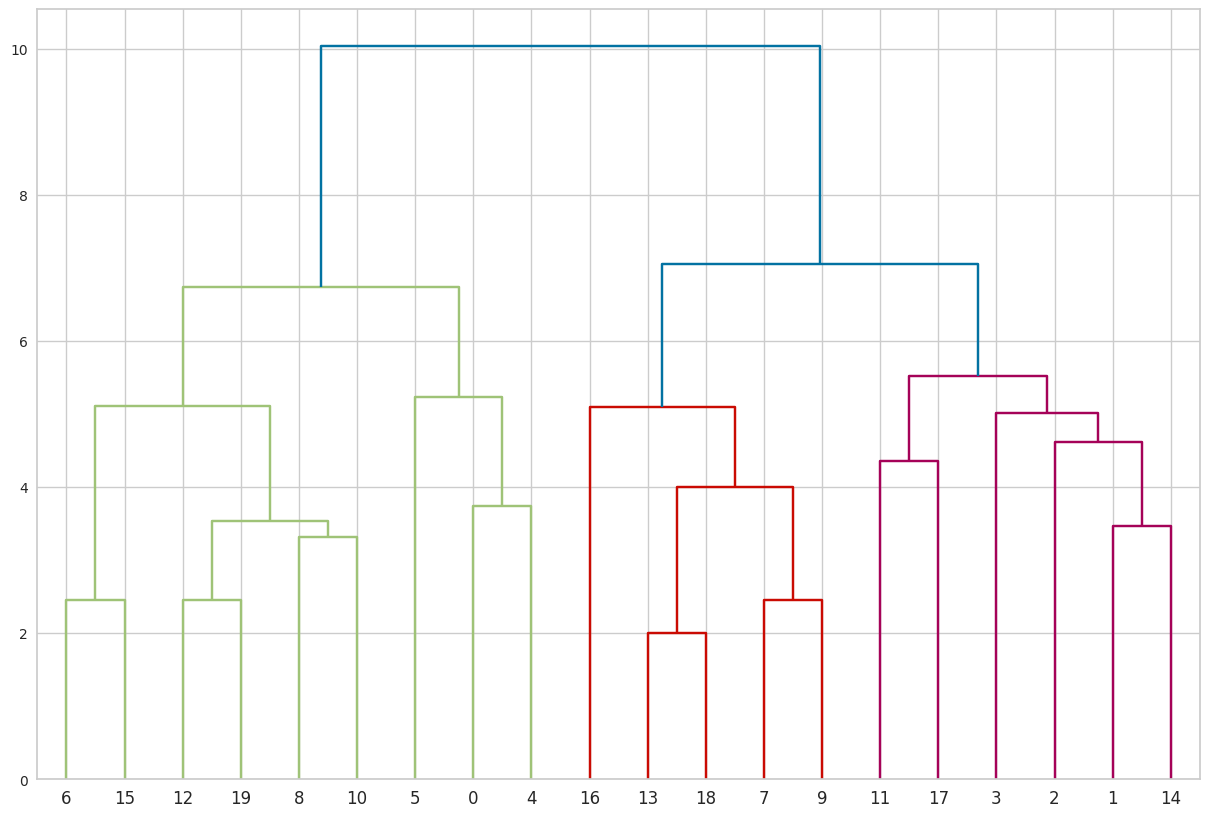

In [ ]:
X = Ascoli_selected_columns.drop(columns=["Segment","SegmentHC"])

tree = hierarchy.linkage(X,'ward')
plt.figure(figsize=(15,10))
dn = hierarchy.dendrogram(tree)

<a id="Tar"></a>
## <font color = "Blue"> Targeting </font>

In order to understand which customer could be targeted with marketing campaigns and offers about Ascoli Piceno, we use targeting on individual customers, using the survey that we previously collected.

In [ ]:
Ascoli_selected_columns

,Gender,Travel Frequency,Price,Accessibility of transportation,Availability of information,Popularity of the place,Cultural/Historical activities,Social activities,Activities in nature,Gastronomical activities,Weather,Discovery,Segment,SegmentHC
respondent_id,,,,,,,,,,,,,,
1,1,2,1,1,3,1,3,3,4,3,2,1,1,1
2,0,4,3,5,4,3,4,3,3,5,4,3,2,2
3,1,2,3,4,4,4,5,5,1,3,4,2,2,2
4,0,4,4,5,4,1,5,5,3,4,5,1,2,2
5,1,1,2,2,4,2,5,3,2,4,2,1,1,1
6,1,5,2,2,2,1,3,2,2,4,3,2,1,1
7,0,2,1,4,3,2,3,2,3,2,4,1,1,1
8,1,3,3,4,5,3,4,3,4,5,2,1,2,2
9,1,3,1,3,4,2,4,2,2,3,4,2,1,1


We have opted for a hybrid targeting approach, combining demographic segmentation with RFM (Recency, Frequency, Monetary value) modeling. Since we lack specific purchase behavior data, we will leverage travel behavior information gathered through surveys. We will assign greater weight to variables that align with the tourist profile for Ascoli Piceno, ranking survey responses accordingly.

In our context, it is crucial to note that the location is not widely known, not easily accessible, yet offers a wealth of cultural, nature, and gastronomical activities, coupled with warm weather. These aspects will be given higher priority in evaluating survey responses.

In the categories that we value more, an higher answer will matter more, and in the categories that we value less a lower answer will matter more.

In [ ]:
targeting_customers = Ascoli_selected_columns

In [ ]:
targeting_customers.loc[targeting_customers['Accessibility of transportation'] == 1, 'Accessibility of transportation'] = 25
targeting_customers.loc[targeting_customers['Accessibility of transportation'] == 2, 'Accessibility of transportation'] = 20
targeting_customers.loc[targeting_customers['Accessibility of transportation'] == 3, 'Accessibility of transportation'] = 10
targeting_customers.loc[targeting_customers['Accessibility of transportation'] == 4, 'Accessibility of transportation'] = 5
targeting_customers.loc[targeting_customers['Accessibility of transportation'] == 5, 'Accessibility of transportation'] = 0

In [ ]:
targeting_customers.loc[targeting_customers['Availability of information'] == 1, 'Availability of information'] = 25
targeting_customers.loc[targeting_customers['Availability of information'] == 2, 'Availability of information'] = 20
targeting_customers.loc[targeting_customers['Availability of information'] == 3, 'Availability of information'] = 10
targeting_customers.loc[targeting_customers['Availability of information'] == 4, 'Availability of information'] = 5
targeting_customers.loc[targeting_customers['Availability of information'] == 5, 'Availability of information'] = 0

In [ ]:
targeting_customers.loc[targeting_customers['Popularity of the place'] == 1, 'Popularity of the place'] = 25
targeting_customers.loc[targeting_customers['Popularity of the place'] == 2, 'Popularity of the place'] = 20
targeting_customers.loc[targeting_customers['Popularity of the place'] == 3, 'Popularity of the place'] = 10
targeting_customers.loc[targeting_customers['Popularity of the place'] == 4, 'Popularity of the place'] = 5
targeting_customers.loc[targeting_customers['Popularity of the place'] == 5, 'Popularity of the place'] = 0

In [ ]:
targeting_customers.loc[targeting_customers['Cultural/Historical activities'] == 1, 'Cultural/Historical activities'] = 0
targeting_customers.loc[targeting_customers['Cultural/Historical activities'] == 2, 'Cultural/Historical activities'] = 5
targeting_customers.loc[targeting_customers['Cultural/Historical activities'] == 3, 'Cultural/Historical activities'] = 10
targeting_customers.loc[targeting_customers['Cultural/Historical activities'] == 4, 'Cultural/Historical activities'] = 20
targeting_customers.loc[targeting_customers['Cultural/Historical activities'] == 5, 'Cultural/Historical activities'] = 25

In [ ]:
targeting_customers.loc[targeting_customers['Activities in nature'] == 1, 'Activities in nature'] = 0
targeting_customers.loc[targeting_customers['Activities in nature'] == 2, 'Activities in nature'] = 5
targeting_customers.loc[targeting_customers['Activities in nature'] == 3, 'Activities in nature'] = 10
targeting_customers.loc[targeting_customers['Activities in nature'] == 4, 'Activities in nature'] = 20
targeting_customers.loc[targeting_customers['Activities in nature'] == 5, 'Activities in nature'] = 25

In [ ]:
targeting_customers.loc[targeting_customers['Gastronomical activities'] == 1, 'Gastronomical activities'] = 0
targeting_customers.loc[targeting_customers['Gastronomical activities'] == 2, 'Gastronomical activities'] = 5
targeting_customers.loc[targeting_customers['Gastronomical activities'] == 3, 'Gastronomical activities'] = 10
targeting_customers.loc[targeting_customers['Gastronomical activities'] == 4, 'Gastronomical activities'] = 20
targeting_customers.loc[targeting_customers['Gastronomical activities'] == 5, 'Gastronomical activities'] = 25

In [ ]:
targeting_customers.loc[targeting_customers['Weather'] == 1, 'Weather'] = 0
targeting_customers.loc[targeting_customers['Weather'] == 2, 'Weather'] = 5
targeting_customers.loc[targeting_customers['Weather'] == 3, 'Weather'] = 15
targeting_customers.loc[targeting_customers['Weather'] == 4, 'Weather'] = 20
targeting_customers.loc[targeting_customers['Weather'] == 5, 'Weather'] = 25

In [ ]:
targeting_customers = targeting_customers[["Accessibility of transportation", "Availability of information", "Popularity of the place", "Cultural/Historical activities", "Activities in nature", "Gastronomical activities", "Weather"]]

In [ ]:
targeting_customers["Rating"]=targeting_customers['Accessibility of transportation']+targeting_customers['Availability of information']+targeting_customers['Popularity of the place']+targeting_customers['Cultural/Historical activities']+targeting_customers['Activities in nature']+targeting_customers['Gastronomical activities']+targeting_customers['Weather']

In [ ]:
targeting_customers.sort_values(by=['Rating'], inplace=True, ascending=False)

In [ ]:
targeting_customers

,Accessibility of transportation,Availability of information,Popularity of the place,Cultural/Historical activities,Activities in nature,Gastronomical activities,Weather,Rating
respondent_id,,,,,,,,
5,20,0,20,25,25,20,25,135
6,20,20,25,10,25,20,15,135
1,25,10,25,10,20,10,25,125
12,10,10,10,20,25,25,20,120
19,0,0,20,25,20,25,15,105
4,0,0,25,25,10,20,25,105
18,10,10,0,25,20,25,15,105
9,10,0,20,20,25,10,20,105
14,0,10,20,10,20,25,20,105


We now have a sorted list of our possible customers, where the people with the highest Rating will probabily be more interesed in a trip to Ascoli Piceno based on the selected parameters.

<a id="Pos"></a>
## <font color = "Blue"> Positioning </font>

As a result of the segmentation process, we obtained two distinct clusters characterized by significantly different values across the following attributes: Price, Transportation, Cultural/Historical activities, Social activities, Activities in nature, and Popularity.

To analyse Ascoli Piceno's positioning, 10 customers were asked to rate Ascoli Piceno and its competitors, Gubbio and Urbino. The scale of the rating is in the range 1 to 5, with 1 being "very low" and 5 being "very high." The ratings were then analyzed to determine Ascoli Piceno's strengths and weaknesses in terms of its positioning in the travel market.

In [ ]:
RA = "https://raw.githubusercontent.com/Dforouzanfar/Marketing-Project/master/Ascoli_Positioning_Ratings.xlsx"
RG = "https://raw.githubusercontent.com/Dforouzanfar/Marketing-Project/master/Gubbio_Positioning_Ratings.xlsx"
RU = "https://raw.githubusercontent.com/Dforouzanfar/Marketing-Project/master/Urbino_Positioning_Ratings.xlsx"

ratings_ascoli = pd.read_excel(RA)
ratings_gubbio = pd.read_excel(RG)
ratings_urbino = pd.read_excel(RU)

In [ ]:
destinations = ['Ascoli Piceno', 'Gubbio', 'Urbino']

In [ ]:
ratings_ascoli.head()

,Price,Transportation,Cultural/Historical activities,Social activities,Activities in nature,Popularity
0,5,1,3,3,4,1
1,4,1,4,3,3,2
2,4,2,5,4,4,3
3,4,3,5,4,3,2
4,5,2,5,3,4,2


In [ ]:
ratings_ascoli_array = ratings_ascoli.to_numpy()
ratings_gubbio_array = ratings_gubbio.to_numpy()
ratings_urbino_array = ratings_urbino.to_numpy()

attributes = ['Price', 'Transportation', 'Cultural/Historical activities', 'Social activities', 'Activities in nature', 'Popularity']

In [ ]:
mean_ascoli = np.mean(ratings_ascoli_array, axis=0)
mean_gubbio = np.mean(ratings_gubbio_array, axis=0)
mean_urbino = np.mean(ratings_urbino_array, axis=0)

mean_vectors = np.vstack([mean_ascoli, mean_gubbio, mean_urbino])

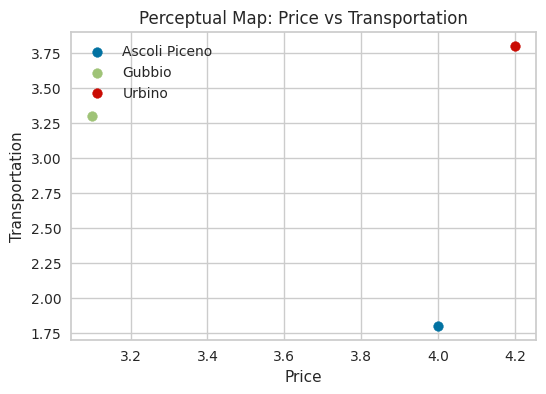

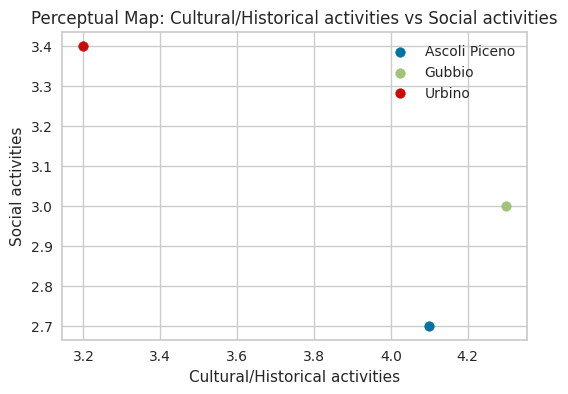

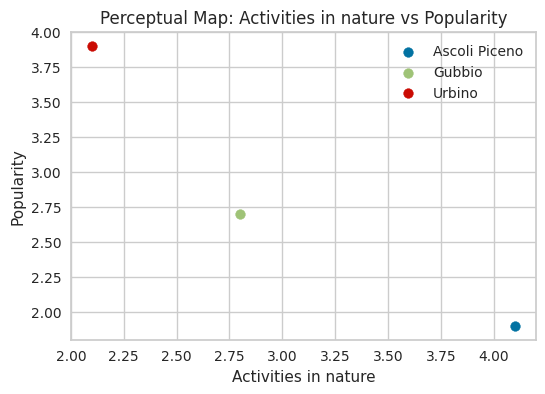

In [ ]:
for i in range(0, len(attributes) - 1, 2):
    attribute1, attribute2 = attributes[i], attributes[i + 1]
    index1, index2 = attributes.index(attribute1), attributes.index(attribute2)

    plt.figure(figsize=(6, 4))

    for destination, mean_vector in zip(destinations, mean_vectors):
        plt.scatter(mean_vector[index1], mean_vector[index2], label=destination, marker='o')

    plt.xlabel(attribute1)
    plt.ylabel(attribute2)
    plt.title(f'Perceptual Map: {attribute1} vs {attribute2}')
    plt.legend()
    plt.grid(True)
    plt.show()

Our perceptual maps for the three destinations reveal some interesting insights into Ascoli Piceno's positioning in the travel market.

***Price vs. Transportation***

Ascoli Piceno is perceived as a moderately priced destination, with a rating of 4.0 compared to 4.2 for Urbino and 3.1 for Gubbio. However, its transportation rating of 1.8 is significantly lower than those of its competitors, which scored 3.3 and 3.8. This suggests that Ascoli Piceno needs to focus on improving its transportation infrastructure in order to attract more visitors.

***Cultural/Historical Activities vs. Social Activities***

Ascoli Piceno is well-positioned in terms of cultural/historical activities, with a rating of 4.2, which is slightly lower than Gubbio's 4.3 but higher than Urbino's 3.2. However, it is perceived as less appealing for social activities, with a rating of 2.7 compared to Urbino's 3.4 and Gubbio's 3.0. This suggests that Ascoli Piceno could benefit from developing a stronger social scene to attract a wider range of travelers.

***Activities in Nature vs. Popularity***

Ascoli Piceno excels in terms of activities in nature, with a rating of 4.1, which is significantly higher than Urbino's 2.1 and Gubbio's 2.8. However, its popularity rating of 1.8 is the lowest among the three destinations. This suggests that Ascoli Piceno needs to increase its visibility and marketing efforts to attract more visitors.

**Overall Strengths and Weaknesses of Ascoli Piceno**

Strengths:

*   Moderately priced
*   Rich cultural and historical attractions
*   Abundant opportunities for outdoor activities

Weaknesses:

*   Poor transportation infrastructure
*   Limited social scene
*   Lack of public awareness

**Competitors' Analysis**

Urbino: Urbino is a popular destination known for its Renaissance architecture and artistic heritage. It is well-connected by transportation and offers a vibrant social scene. However, it is also more expensive than Ascoli Piceno and has fewer opportunities for outdoor activities.

Gubbio: Gubbio is a smaller and more affordable destination known for its medieval charm and its beautiful setting in the Umbrian hills. It offers a good balance of cultural and natural attractions, but it lacks the transportation infrastructure of Urbino.

**Recommendations for Ascoli Piceno**

*Improve transportation infrastructure*: Ascoli Piceno should invest in upgrading its transportation system, including expanding public transportation options and improving roads and highways.

*Develop a stronger social scene*: Ascoli Piceno should create more opportunities for social interaction, such as organizing events, festivals, and nightlife activities.

*Increase visibility and marketing efforts*: Ascoli Piceno should increase its visibility and marketing efforts to attract more visitors. This could include promoting the city's unique attractions, improving its online presence, and participating in travel fairs and other industry events.

By addressing its weaknesses and building upon its strengths, Ascoli Piceno can continue to attract travelers who are looking for a unique and affordable travel experience.